**#Predicting the scale Price of Bulldozers using Machine Learning**
In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

**##1. Problem defination**

How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

**##2. Data**

The data is downloaded from the Kaggle Bluebook for Bulldozers competition:
*Train.csv is the training set, which contains data through the end of 2011.*
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.*
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.**

##3. Evaluati**o
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
For more evluation info:

https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

Note:The goal for most regression evaluation metrics is to minimize the error . For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

**

##4. Featur**e
Kaggle provides a data dictionary detailing all of the features of the dataset. 
s


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Import trainiing and validation sets
df=pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
              low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the parse_dates parameter.


In [5]:
#Import data again but this time parse dates
df= pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

In [6]:
df.saledate.dtype

dtype('<M8[ns]')

In [7]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

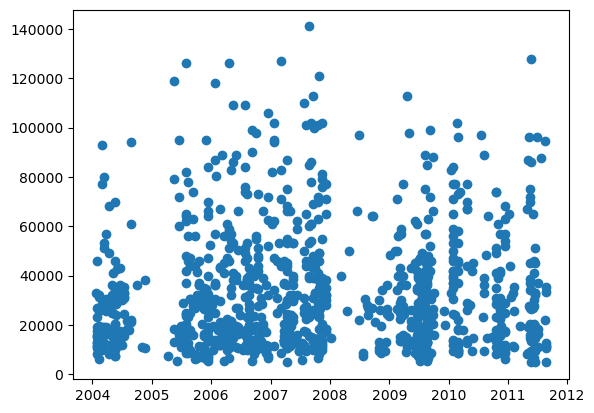

In [8]:
fig , ax = plt.subplots()
ax.scatter(df.saledate[:1000],df.SalePrice[:1000]);

In [9]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

In [10]:
#Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace = True , ascending= True)
df.saledate.head(20)


205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

**Make a copy of original dataFrame**

We make a copy of the original dataframe so whr we manipulate the copy , we've still got our original data.

In [11]:
#Make a copy
df_tmp= df.copy()

In [12]:
df_tmp.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

__Add datetime parameter for saledate column__


In [13]:
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDay"][:1]

205615    17
Name: saleDay, dtype: int32

In [14]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleYear"][:1]

205615    1989
Name: saleYear, dtype: int32

In [15]:
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleMonth"][:1]

205615    1
Name: saleMonth, dtype: int32

In [16]:
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp.saleDayOfWeek[:1]

205615    1
Name: saleDayOfWeek, dtype: int32

In [17]:
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear
df_tmp.saleDayOfYear[:1]

205615    17
Name: saleDayOfYear, dtype: int32

In [18]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [19]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [20]:
df_tmp.drop("saledate", axis =1 , inplace=True)
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [21]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

__Convert strings into categories__

One way we can turn all of our data into numbers is by converting them into pandas categories.

In [22]:
pd.api.types.is_string_dtype(df_tmp.UsageBand)

False

In [23]:
df_tmp.UsageBand.dtype

dtype('O')

In [24]:
#Find the column which contains strings 
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [25]:
#This will turn all the string values into categories
for label , content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()
       

In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [27]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [28]:
df_tmp.state.value_counts

<bound method IndexOpsMixin.value_counts of 205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']>

In [29]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

__Save preprocessed data__

In [30]:
df_tmp.to_csv("bluebook-for-bulldozers/train_tmp.csv",
             index=False)

In [31]:
#Import preprocessed data
df_tmp = pd.read_csv("bluebook-for-bulldozers/train_tmp.csv",
                    low_memory = False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


__Fill missing values__

__Fill numerical missing values__

In [32]:
#Check for which numeric columns have null values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [33]:
#Fill numeric rows with the median 
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column which tells us if the data was missing or not
            df_tmp[label+"is_missing"]= pd.isnull(content)
            #Fill missing numeric values with median
            df_tmp[label]=content.fillna(content.median())

In [34]:
#Check if there any null numeric values
for label , content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [35]:
#Check to see how many examples were missing
df_tmp.auctioneerIDis_missing.value_counts()

auctioneerIDis_missing
False    392562
True      20136
Name: count, dtype: int64

__Filling and turning categorical variables into numbers__

In [36]:
#Check for column which aren't numeric
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [37]:
#Through this we convert categories into numbers
pd.Categorical(df_tmp.state).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [38]:
#Turn categorical variables into numbers and filling missing values
for label , content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"is_missing"]= pd.isnull(content)
        #Turn categories into numbers and add +1
        #(we add one so that if any category have false value we get zero instead of nehative value)
        df_tmp[label]= pd.Categorical(content).codes+1


In [39]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [40]:
df_tmp.isna().sum()[:15]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
dtype: int64

In [41]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mountingis_missing,False,True,False,True,False
Blade_Typeis_missing,False,True,False,True,False
Travel_Controlsis_missing,False,True,False,True,False
Differential_Typeis_missing,True,False,True,False,True


In [42]:
%%time
from sklearn.ensemble import RandomForestRegressor
#Instantiate model
model= RandomForestRegressor(n_jobs=-1,
                             random_state=42)
#Fit the model
model.fit(df_tmp.drop("SalePrice" , axis =1 ) , df_tmp["SalePrice"])

CPU times: total: 24min 8s
Wall time: 6min 32s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [43]:
#Score the model
model.score(df_tmp.drop("SalePrice" , axis=1), df_tmp["SalePrice"])

0.9875457596753684

In [44]:
#Split data into training and validation 
df_val = df_tmp[df_tmp.saleYear==2012]
df_train =df_tmp[df_tmp.saleYear!=2012]
len(df_val), len(df_train)

(11573, 401125)

In [45]:
#Split data into x & y
x_train, y_train =df_train.drop("SalePrice", axis=1),df_train.SalePrice
x_valid, y_valid = df_val.drop("SalePrice",axis=1),df_val.SalePrice
x_train.shape , x_valid.shape, y_train.shape, y_valid.shape

((401125, 102), (11573, 102), (401125,), (11573,))

__Build an Evaluation function__

In [46]:
#Create evaluation function(the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
def rmsle(y_test, y_preds):
    """
    Calculate root mean squared log error between predictions and true lables.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))
  #Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds =  model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid,val_preds),
              "Training RMSLE": rmsle(y_train , train_preds),
              "Valid RMSLE": rmsle(y_valid,val_preds),
              "Training R^2": r2_score(y_train,train_preds),
              "Valid R^2": r2_score(y_valid,val_preds)}
    return scores


In [47]:
#%%time
#model =RandomForestRegressor(n_jobs=-1,
                            #random_state=42)
#model.fit(x_tarin,y_train)


In [48]:
#Change max_samples values
model= RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)


In [49]:
%%time
model.fit(x_train,y_train)

CPU times: total: 48.5 s
Wall time: 12.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [50]:
show_scores(model)

{'Training MAE': 5562.5043451791835,
 'Valid MAE': 7165.678254558023,
 'Training RMSLE': 0.2577691045088714,
 'Valid RMSLE': 0.2929032006705841,
 'Training R^2': 0.8606519928192577,
 'Valid R^2': 0.8322532008949128}

__Hyperparameter tuning with RandomizedSearchCV__

In [51]:
%%time
from sklearn.model_selection import RandomizedSearchCV
#Different RandomForestFRegressor hyperparameters
rf_grid ={"n_estimators":np.arange(10,100,10),
          "max_depth": [None, 3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2),
          "max_features":[0.5,1,"sqrt","auto"],
          "max_samples":[10000]}
rf_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)
#Fit the RandomizedSearchCV model
rf_model.fit(x_train,y_train)
                                            

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 1min
Wall time: 22.5 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [52]:
rf_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [53]:
show_scores(rf_model)

{'Training MAE': 8945.78574376919,
 'Valid MAE': 10397.439118225282,
 'Training RMSLE': 0.39359016506649314,
 'Valid RMSLE': 0.414408067623882,
 'Training R^2': 0.6835015064640784,
 'Valid R^2': 0.6896856274334766}

__Train a model  with the best hyperparameters__

__Note:__ These were found after 100 iterations of RandomizedSearchCV.

In [54]:
%%time
#Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=20,
                                    min_samples_leaf=7,
                                    min_samples_split=14,
                                    max_features="sqrt",
                                    n_jobs=-1,
                                    max_samples=None,
                                   random_state=42)
#Fit the model
ideal_model.fit(x_train,y_train)


CPU times: total: 35.5 s
Wall time: 10 s


RandomForestRegressor(max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=14, n_estimators=20, n_jobs=-1,
                      random_state=42)

In [55]:
show_scores(ideal_model)

{'Training MAE': 5278.714801908124,
 'Valid MAE': 7137.658702305528,
 'Training RMSLE': 0.24339335451616076,
 'Valid RMSLE': 0.2955224877002201,
 'Training R^2': 0.8774826716561702,
 'Valid R^2': 0.8385009614016576}

In [56]:
show_scores(rf_model)

{'Training MAE': 8945.78574376919,
 'Valid MAE': 10397.439118225282,
 'Training RMSLE': 0.39359016506649314,
 'Valid RMSLE': 0.41440806762388205,
 'Training R^2': 0.6835015064640784,
 'Valid R^2': 0.6896856274334766}

__Make predictions o test data__


In [57]:
df_test=pd.read_csv("bluebook-for-bulldozers/Test.csv",
                   low_memory=False,
                   parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


__Preprocessing the data (getting the test dataset in the same format as our training dataset)__

In [58]:
def preprocess_data(df):
    """
    Perform transformation on df and returns transformed df.
    """
    df["saleYear"]=df.saledate.dt.year
    df["saleMonth"]=df.saledate.dt.month
    df["saleDay"]=df.saledate.dt.day
    df["saleDayOfWeek"]=df.saledate.dt.dayofweek
    df["saleDayOfYear"]=df.saledate.dt.dayofyear
    df.drop("saledate",axis=1,inplace=True)
    #Fill the numeric rows with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #add a binary colum which tells us if the data was missing or not
                df[label+"is_missing"]=pd.isnull(content)
                #Fill missing numeric valuess with median
                df[label]=content.fillna(content.median())
                #Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"is_missing"]=pd.isnull(content)
            df[label]=pd.Categorical(content).codes+1
    return df

In [59]:
#Process the test data
df_test= preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [60]:
#Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerIDis_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [61]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [62]:
#We can find how the columns differ using sets
set(x_train.columns)-set(df_test.columns)

set()

In [63]:
#Manually adjust df_test to have auctioneerID_is_missing column
#df_test['auctioneerIDis_missing']=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally now our test dataframe has the same features as our training dataframe, we can make predictions!

__Reorder and Predict:__

In [64]:
feature_order = ideal_model.feature_names_in_  # or similar attribute
df_test = df_test[feature_order]


In [65]:
#Make predictions on test data
test_preds = ideal_model.predict(df_test)
test_preds

array([18042.35650514, 20093.21042538, 43165.90505858, ...,
       22438.31783182, 23681.91684189, 29672.5760376 ])

In [66]:
#Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalesPrice"]=test_preds
df_preds

,SalesID,SalesPrice
0,1227829,18042.356505
1,1227844,20093.210425
2,1227847,43165.905059
3,1227848,50030.095119
4,1227863,39237.637695
...,...,...
12452,6643171,27781.524613
12453,6643173,29849.524005
12454,6643184,22438.317832
12455,6643186,23681.916842


In [67]:
#Export prediction data
df_preds.to_csv('bluebook-for-bulldozers/test_predictions.csv' , index = False)

In [70]:
#Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df=(pd.DataFrame({"features":columns,
                      "feature_importances":importances})
        .sort_values("feature_importances",ascending=False)
        .reset_index(drop=True))
    #Plot the dataframe
    fig,ax = plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

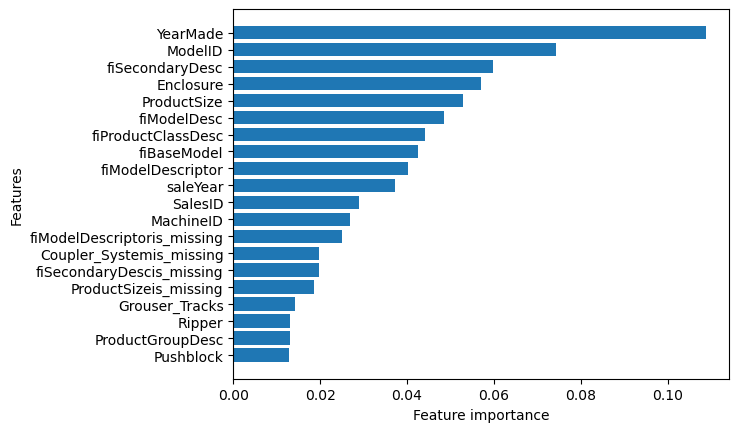

In [71]:
plot_features(x_train.columns, ideal_model.feature_importances_)